# Univarient Analysis

# Step 1 - Data ingestion

In [2]:
import pandas as pd
path1 = r"C:\Users\gauri\Downloads\Cars93 (1).csv"
print(path1)
df = pd.read_csv(path1, na_values = ["", "NA"], keep_default_na=False)
df.head()

C:\Users\gauri\Downloads\Cars93 (1).csv


,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
df.shape

(94, 28)

# Step 2 - Perform basic data quality checks

In [5]:
df.shape

(94, 28)

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(93, 28)

In [8]:
m = df.isna().sum()
m[m>0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

# Clean the data
1. categorical - mode
2. continous - mean / median

In [9]:
df["AirBags"].mode()

0    Driver only
Name: AirBags, dtype: object

In [10]:
df["AirBags"].mode()[0]

'Driver only'

In [11]:
df["Luggage.room"].mean()

np.float64(13.890243902439025)

In [12]:
df["Luggage.room"].median()

14.0

In [3]:
df.select_dtypes(include="object").columns.tolist()

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [4]:
def replacer(df: pd.DataFrame):
    cat_cols = df.select_dtypes(include="object").columns.tolist()
    for i in df.columns:
        if i in cat_cols:
            mode = df[i].mode()[0]
            df[i] = df[i].fillna(mode)
        else:
            median = df[i].median()
            df[i] = df[i].fillna(median)

In [5]:
replacer(df)

In [6]:
df.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

# Step 3 - Perform Descriptive analysis 

In [7]:
df.describe(include="object").T

,count,unique,top,freq
Manufacturer,94,32,Chevrolet,8
Model,94,93,Integra,2
Type,94,6,Small,22
AirBags,94,3,Driver only,46
DriveTrain,94,3,Front,68
Cylinders,94,6,4,50
Man.trans.avail,94,2,Yes,62
Origin,94,2,USA,48
Make,94,93,Acura Integra,2


In [11]:
df["Manufacturer"].value_counts()

Manufacturer
Chevrolet        8
Ford             8
Dodge            6
Mazda            5
Pontiac          5
Oldsmobile       4
Hyundai          4
Buick            4
Nissan           4
Toyota           4
Volkswagen       4
Subaru           3
Acura            3
Honda            3
Geo              2
Audi             2
Volvo            2
Mitsubishi       2
Mercedes-Benz    2
Lexus            2
Chrysler         2
Cadillac         2
Eagle            2
Lincoln          2
Mercury          2
Infiniti         1
BMW              1
Chrylser         1
Plymouth         1
Saab             1
Saturn           1
Suzuki           1
Name: count, dtype: int64

In [14]:
df["DriveTrain"].value_counts()

DriveTrain
Front    68
Rear     16
4WD      10
Name: count, dtype: int64

In [15]:
df.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
id,94.0,46.510638,27.261278,1.0,23.250,46.50,69.750,93.0
Min.Price,94.0,17.080851,8.709793,6.7,10.825,14.60,20.250,45.4
Price,94.0,19.471277,9.614568,7.4,12.275,17.60,23.150,61.9
Max.Price,94.0,21.865957,10.975648,7.9,14.750,19.55,25.200,80.0
MPG.city,94.0,22.393617,5.596116,15.0,18.000,21.00,25.000,46.0
MPG.highway,94.0,29.106383,5.306657,20.0,26.000,28.00,31.000,50.0
EngineSize,94.0,2.658511,1.035645,1.0,1.800,2.35,3.275,5.7
Horsepower,94.0,143.787234,52.093562,55.0,103.500,140.00,170.000,300.0
RPM,94.0,5291.489362,602.755246,3800.0,4800.000,5250.00,5787.500,6500.0
Rev.per.mile,94.0,2338.138298,497.169939,1320.0,1986.250,2350.00,2587.500,3755.0


In [16]:
b = (
    df.groupby(by = "Type")
    .describe(include="number")["Weight"]
    .T
)
b

Type,Compact,Large,Midsize,Small,Sporty,Van
count,16.000000,11.000000,22.000000,22.000000,14.000000,9.000000
mean,2918.125000,3695.454545,3400.000000,2330.681818,2899.642857,3830.555556
std,216.386036,254.140262,321.355018,273.932106,407.621923,154.099084
min,2490.000000,3470.000000,2880.000000,1695.000000,2285.000000,3705.000000
25%,2782.500000,3492.500000,3196.250000,2247.500000,2657.500000,3715.000000
50%,2970.000000,3570.000000,3472.500000,2347.500000,2857.500000,3735.000000
75%,3042.500000,3930.000000,3597.500000,2521.250000,3167.500000,3960.000000
max,3375.000000,4105.000000,4000.000000,2705.000000,3805.000000,4100.000000


In [17]:
c = (
    df.groupby(by = "DriveTrain")
    .describe(include = "number")["Price"]
    .T
)
c

DriveTrain,4WD,Front,Rear
count,10.000000,68.000000,16.000000
mean,17.630000,17.511765,28.950000
std,5.240028,7.781926,13.063537
min,8.400000,7.400000,14.900000
25%,14.950000,11.375000,18.525000
50%,19.050000,15.900000,26.850000
75%,19.800000,20.325000,35.425000
max,25.800000,40.100000,61.900000


# Data Visualisation
1. Univariate - analysis odf single column at a time
2. catgorial - Countplot
3. countinous(numerical) - histogram 

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df["DriveTrain"].value_counts()

DriveTrain
Front    68
Rear     16
4WD      10
Name: count, dtype: int64

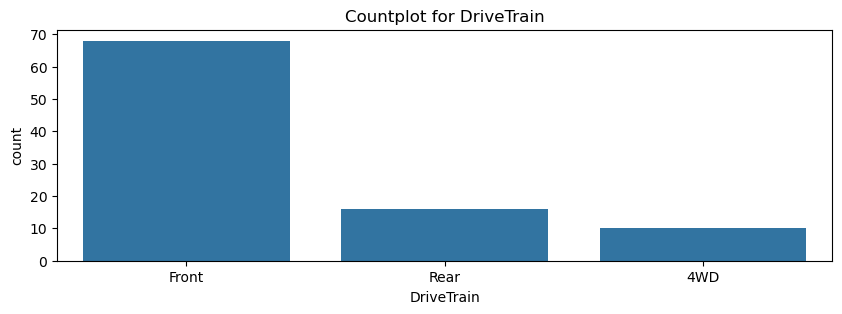

In [23]:
plt.figure(figsize=(10, 3)) # Change the figsize
sns.countplot(data=df, x="DriveTrain") # Plots the chart
plt.title("Countplot for DriveTrain") # Add the title
plt.show() # show the plot

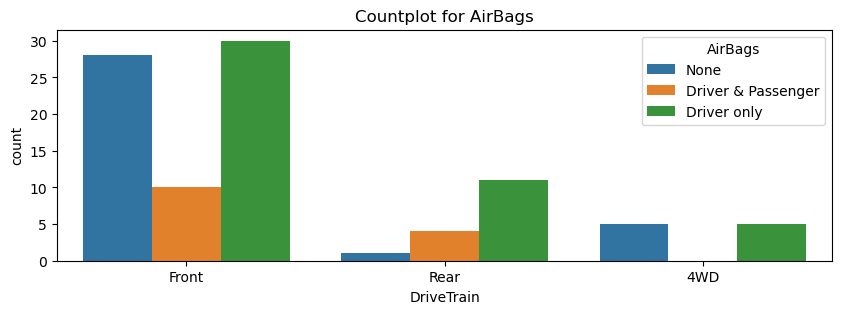

In [24]:
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x="DriveTrain", hue="AirBags")
plt.title("Countplot for AirBags")
plt.show()


# Count plot for all categorical features

In [25]:
cat_cols = df.select_dtypes(include="object").columns.tolist()
print(cat_cols)


['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']


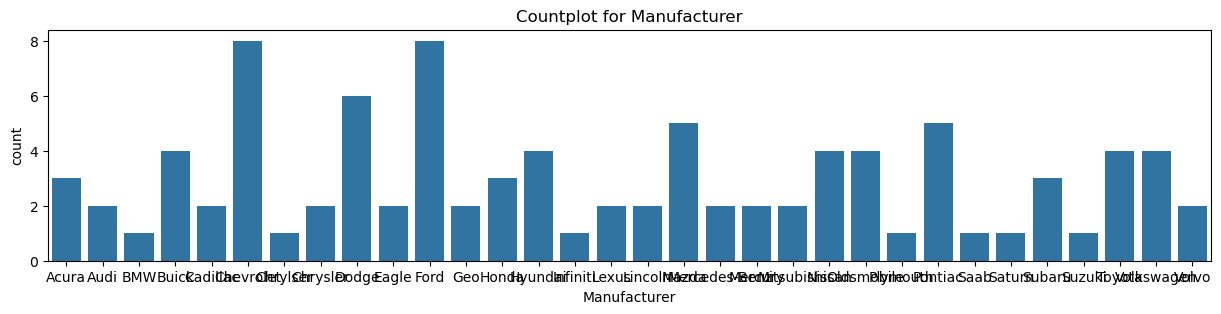

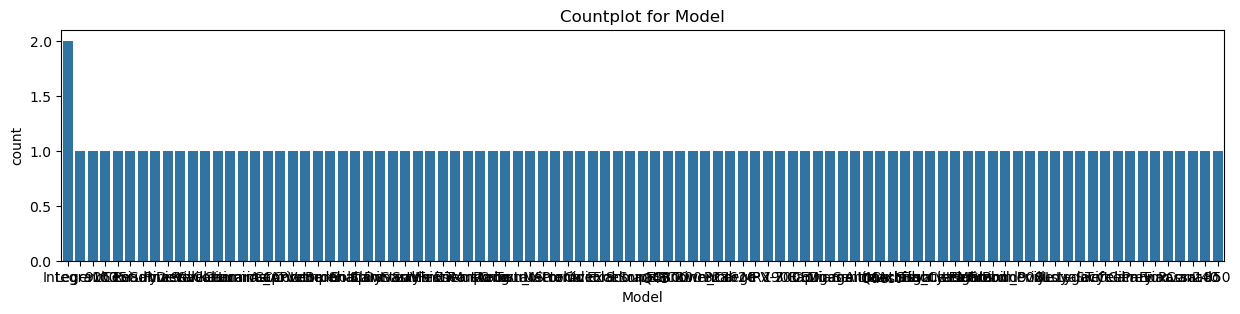

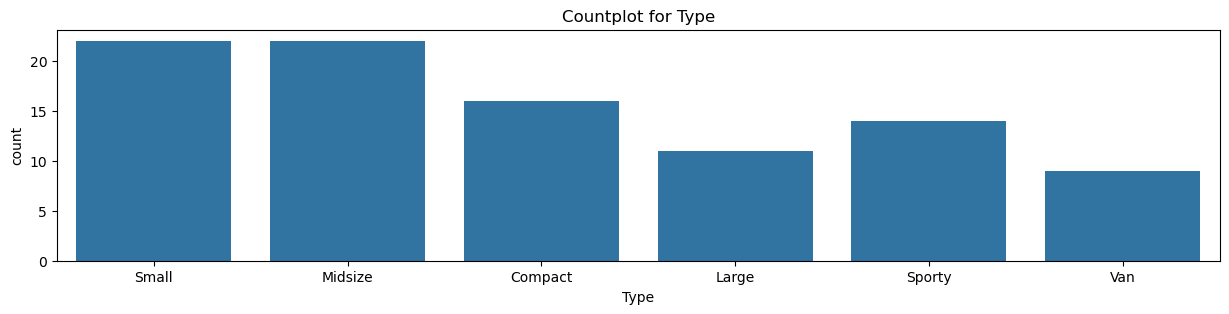

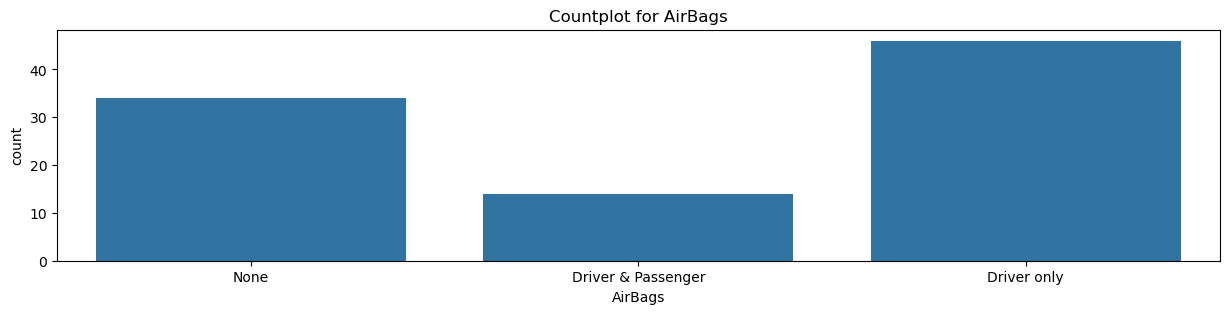

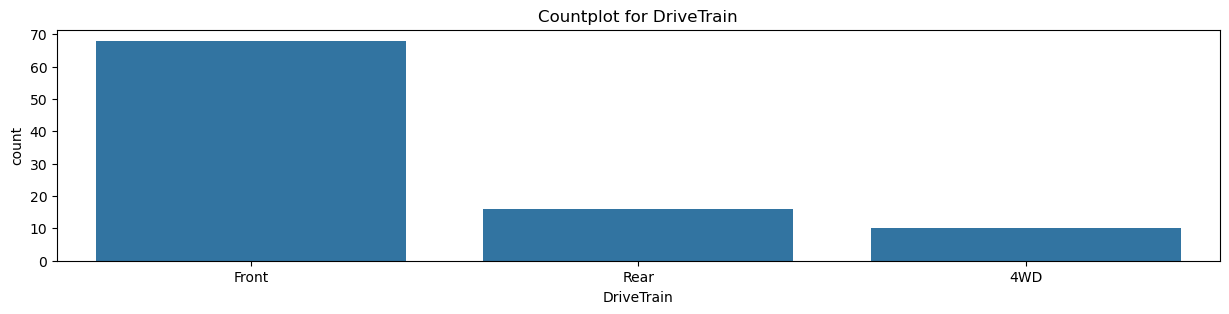

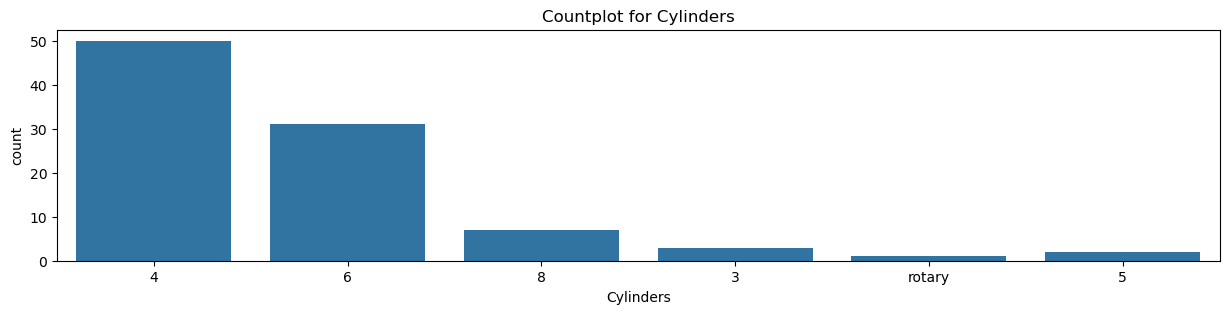

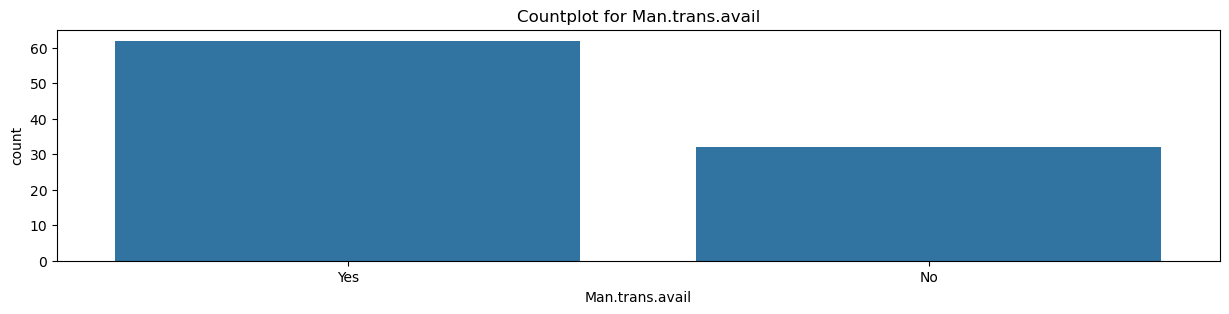

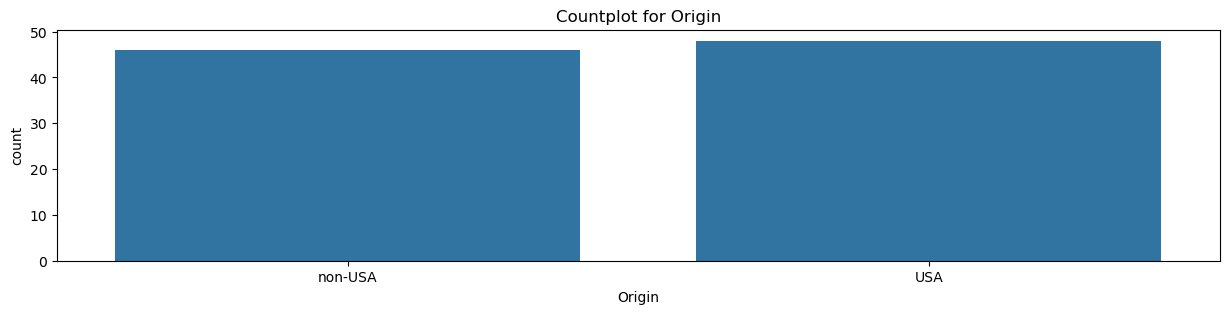

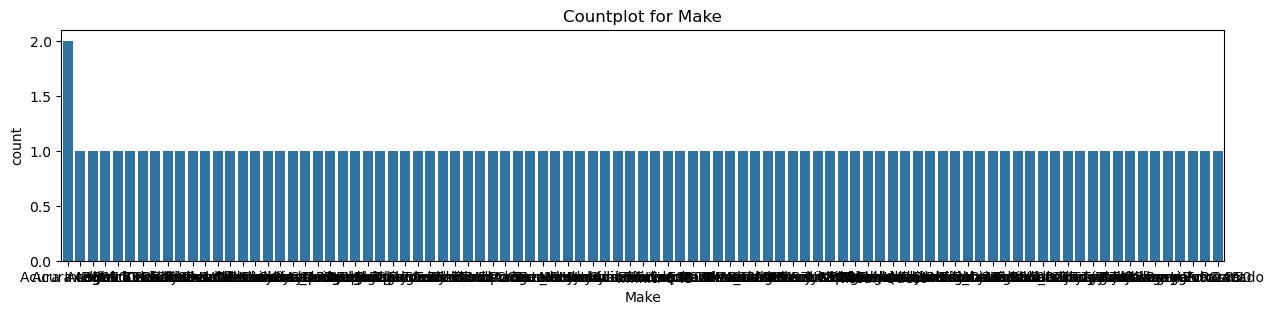

In [26]:
for i in cat_cols:
    plt.figure(figsize=(15, 3))
    sns.countplot(data=df, x=i)
    plt.title(f"Countplot for {i}")
    plt.show()

# Subplots
Show 4 charts

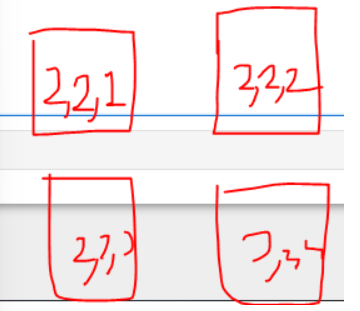

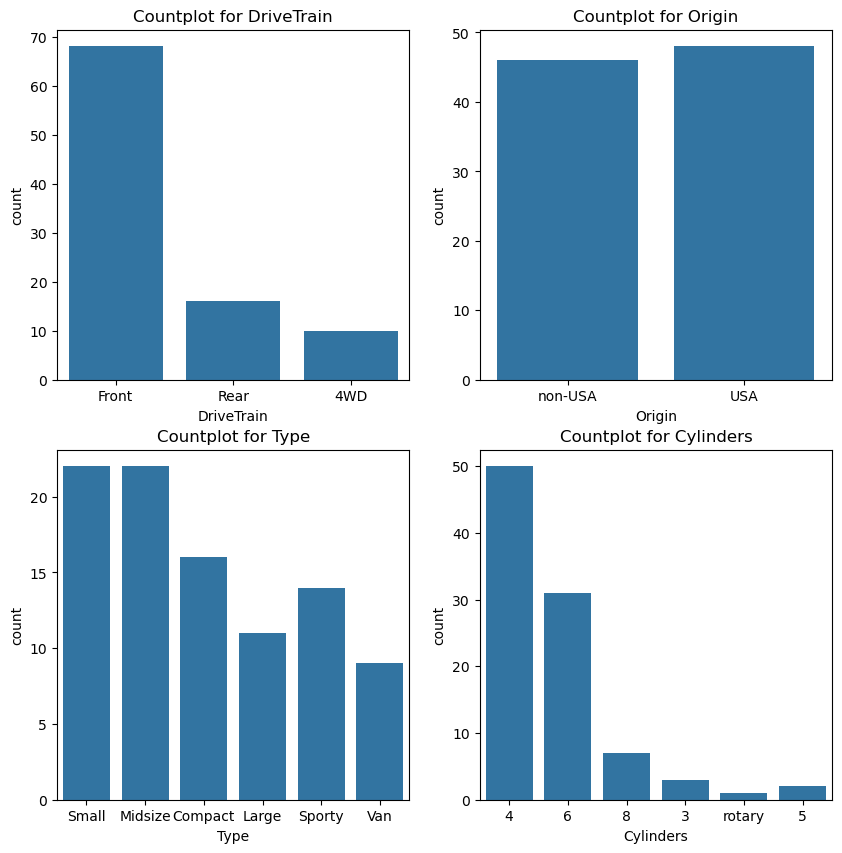

In [27]:
cat_cols = ["DriveTrain", "Origin", "Type", "Cylinders"]

plt.figure(figsize=(10, 10))
for idx, value in enumerate(cat_cols):
    plt.subplot(2, 2, idx+1)
    sns.countplot(data=df, x=value)
    plt.title(f"Countplot for {value}")

plt.show()

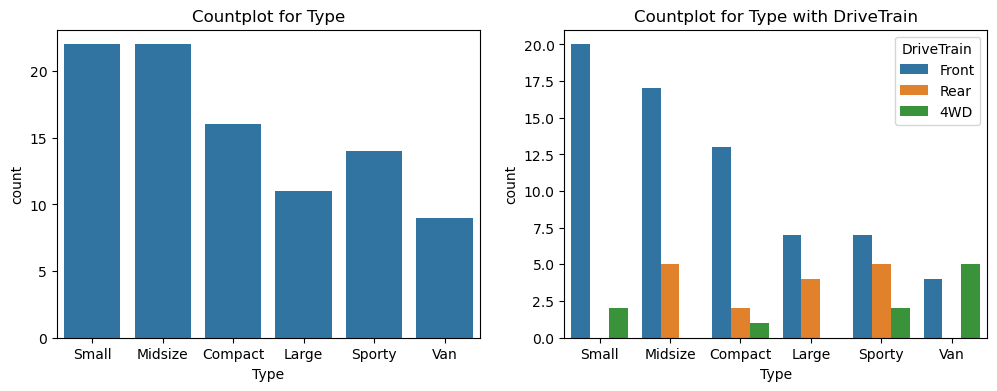

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x="Type")
plt.title("Countplot for Type")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="Type", hue="DriveTrain")
plt.title("Countplot for Type with DriveTrain")

plt.show()

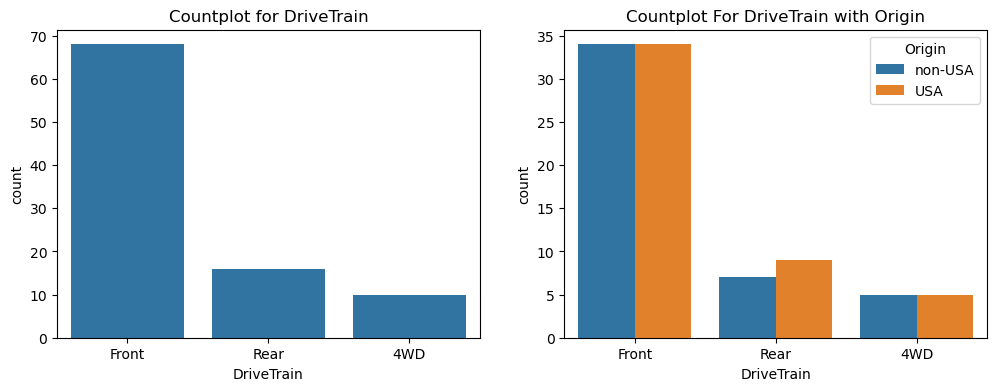

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x="DriveTrain")
plt.title("Countplot for DriveTrain")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x="DriveTrain", hue="Origin")
plt.title("Countplot For DriveTrain with Origin")
plt.show()

# Continous Features- Histogram Density Plot

In [30]:
num_cols = df.select_dtypes(include="number").columns.tolist()
num_cols

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [31]:
num_cols.remove("id")

In [32]:
num_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

# KDA - Kernel Density Estimate

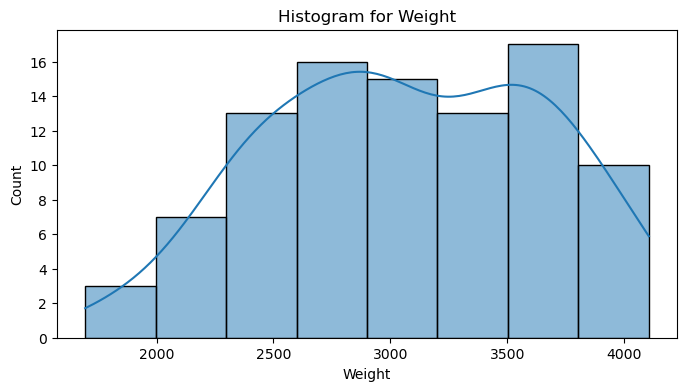

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x="Weight", kde=True)
plt.title("Histogram for Weight")
plt.show()

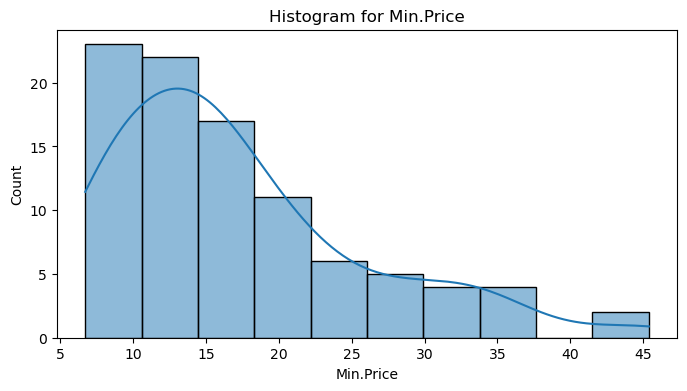

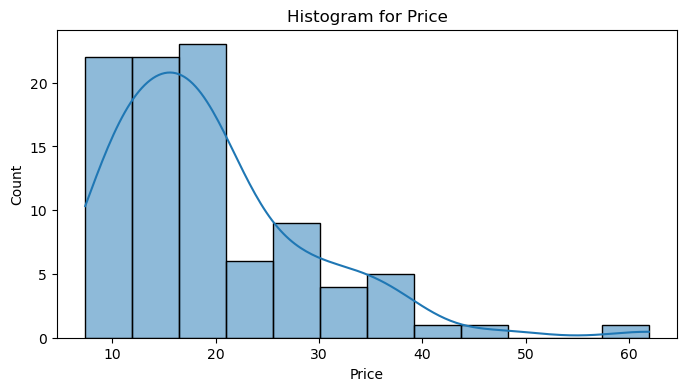

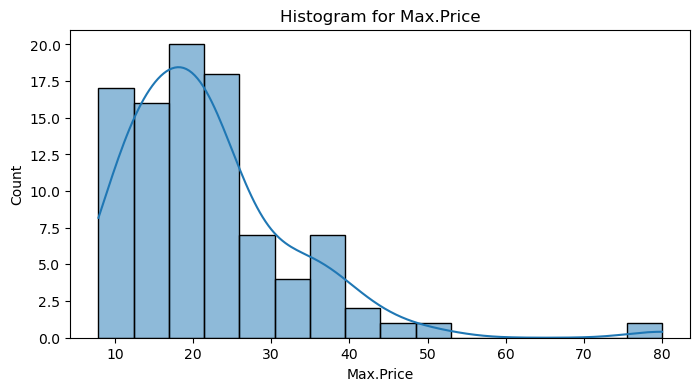

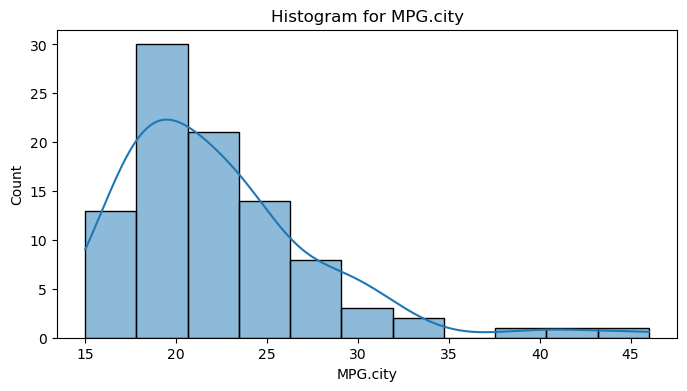

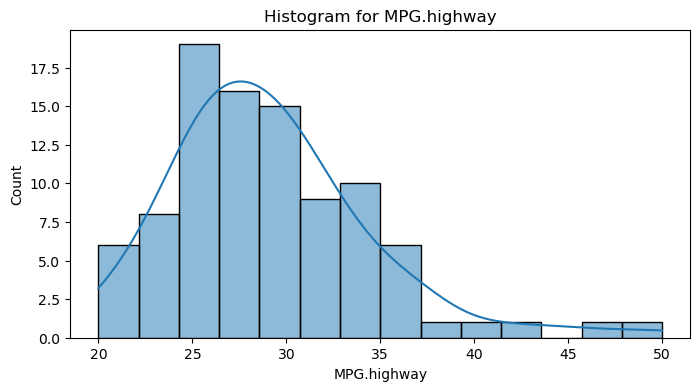

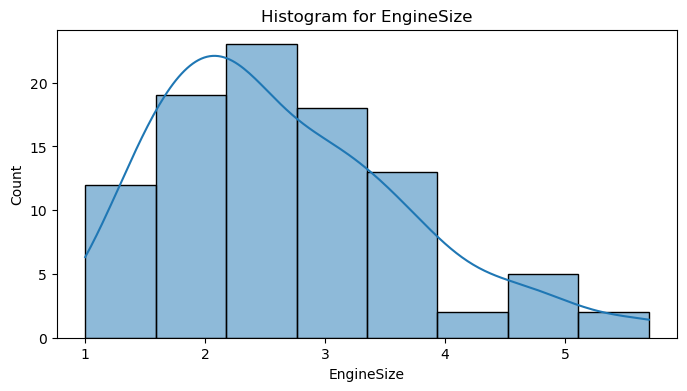

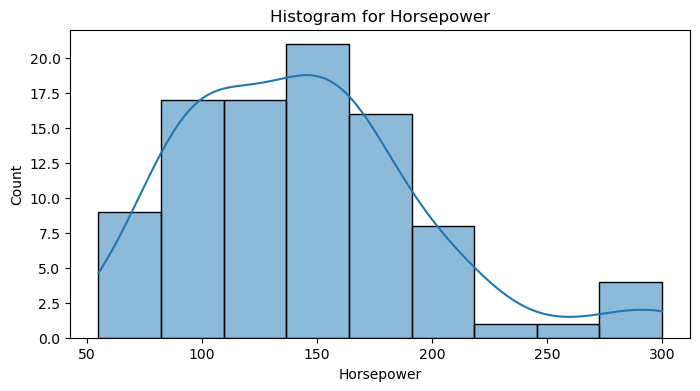

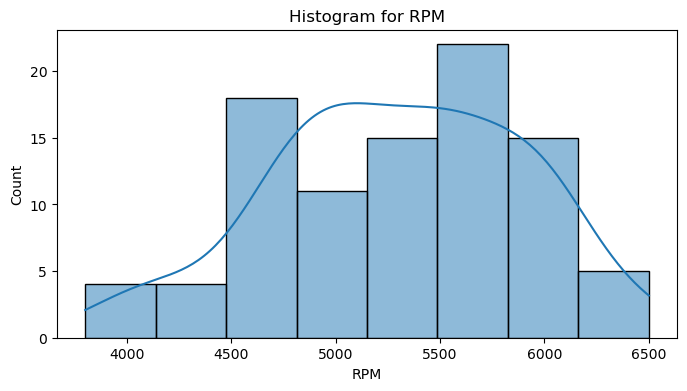

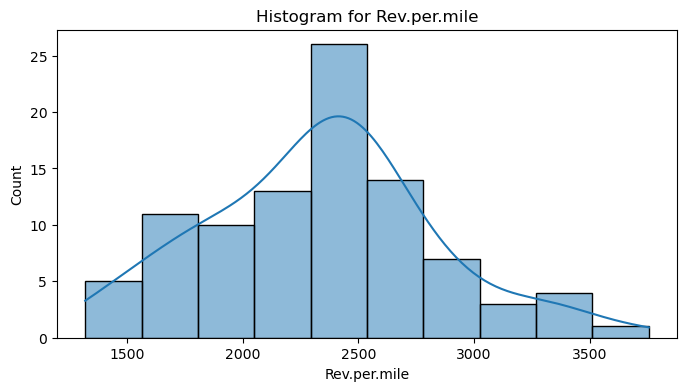

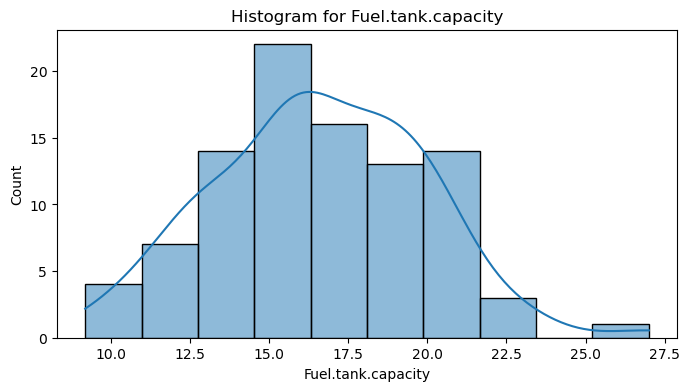

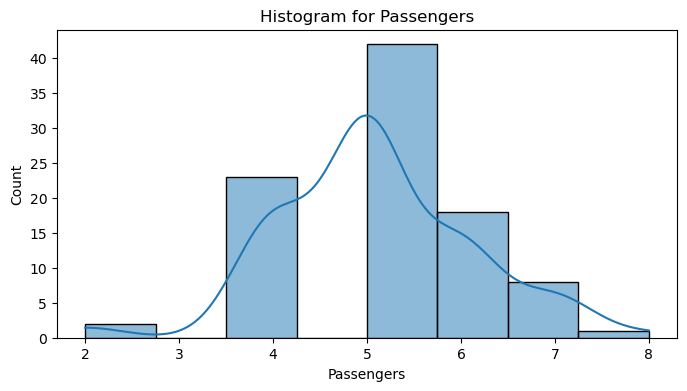

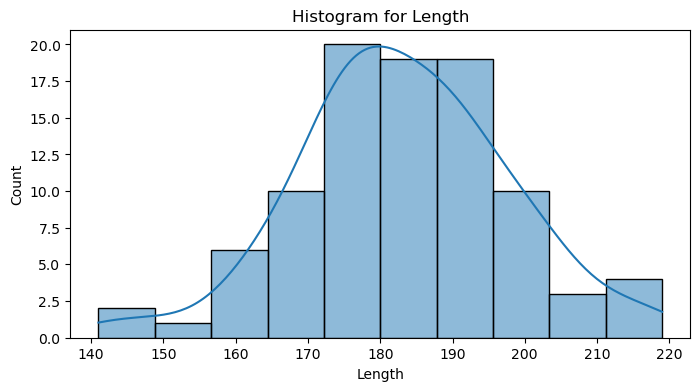

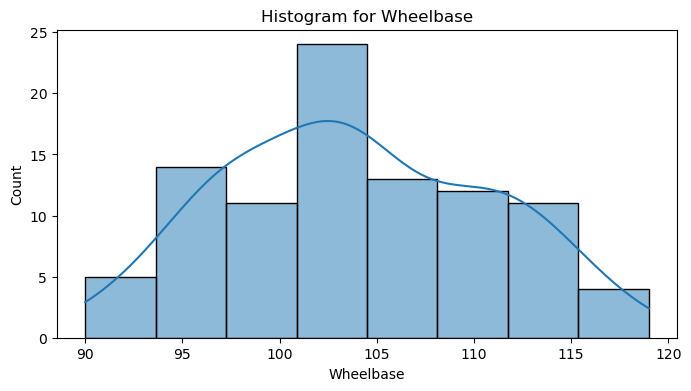

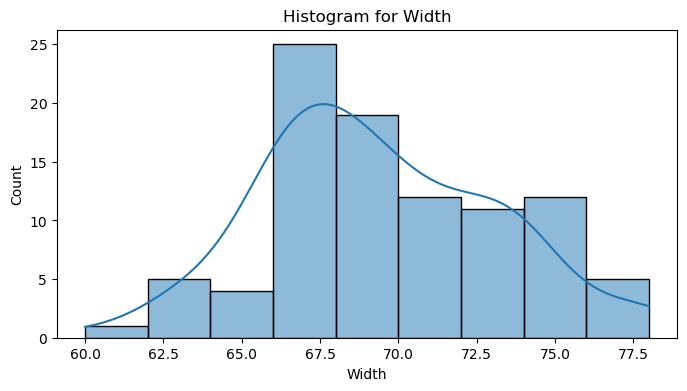

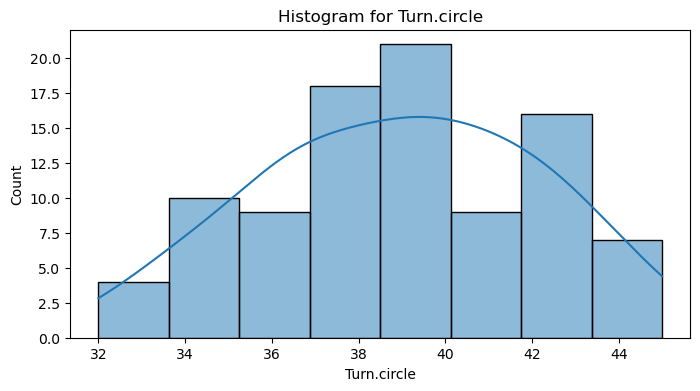

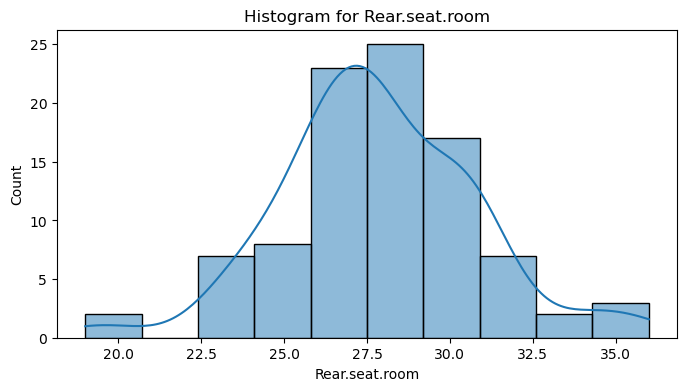

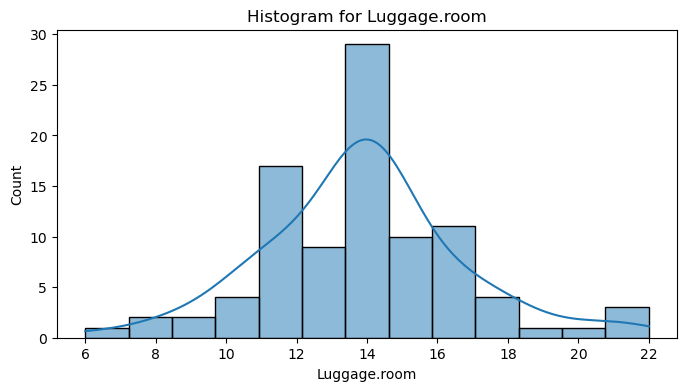

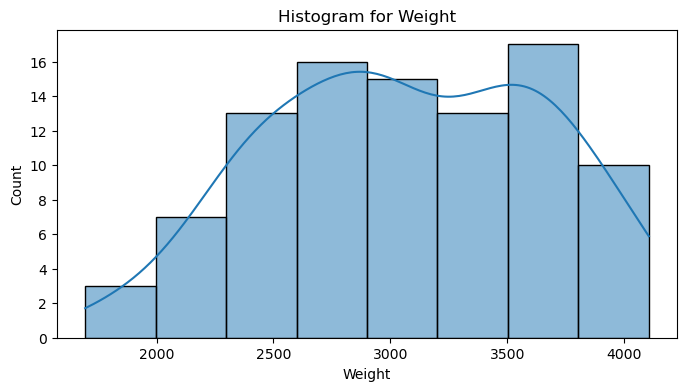

In [34]:
for i in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f"Histogram for {i}")
    plt.show()


<Axes: xlabel='Weight', ylabel='Count'>

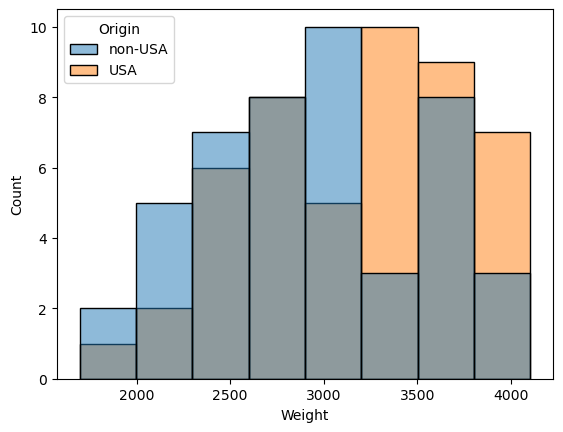

In [35]:
sns.histplot(data=df, x="Weight", hue="Origin")

<Axes: xlabel='Weight', ylabel='Density'>

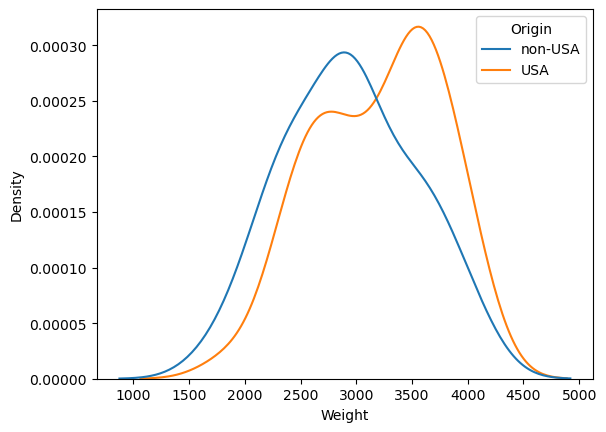

In [36]:
sns.kdeplot(data=df, x="Weight", hue="Origin")

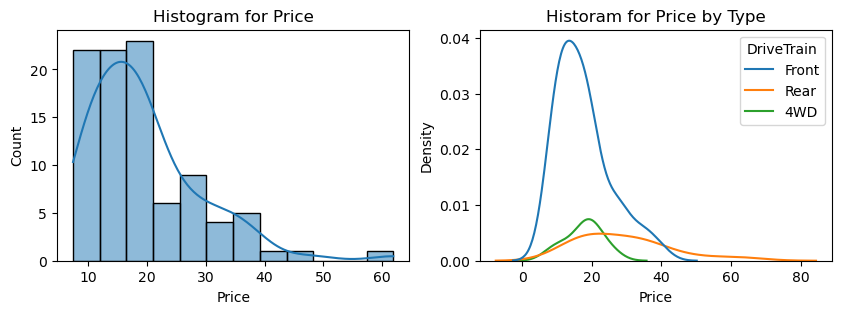

In [37]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Price", kde=True)
plt.title("Histogram for Price")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Price", hue="DriveTrain")
plt.title("Historam for Price by Type")
plt.show()

In [38]:
num_cols

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

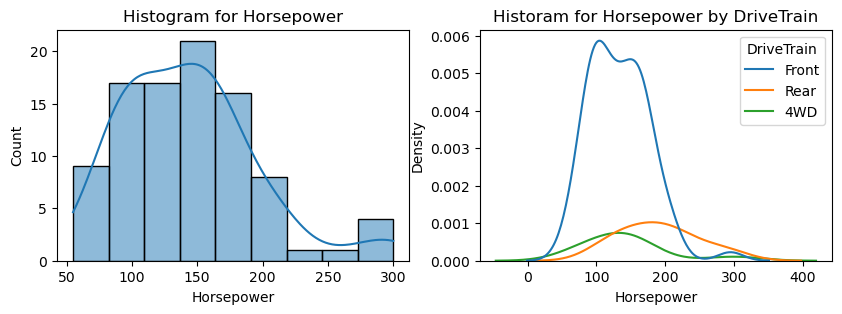

In [39]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Horsepower", kde=True)
plt.title("Histogram for Horsepower")

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="Horsepower", hue="DriveTrain")
plt.title("Historam for Horsepower by DriveTrain")
plt.show()

# Show average Horsepower by car type

In [40]:
a = (
    df.groupby(by = "Type")
    .agg({"Horsepower": "mean"})
    .sort_values(by = "Horsepower", ascending=False)
    .round(2)
)

print(a)

         Horsepower
Type               
Large        179.45
Midsize      173.09
Sporty       160.14
Van          149.44
Compact      131.00
Small         93.23


<Axes: xlabel='Type'>

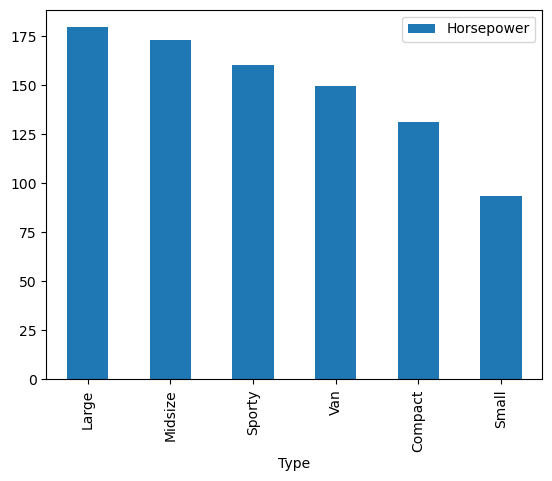

In [41]:
a.plot(kind="bar")

# Show the median price for each type

In [42]:
b = (
    df.groupby(by = "Type")
    .agg({"Price": "median"})
    .sort_values(by = "Price", ascending=False)
    .round(2)
)
print(b)


         Price
Type          
Midsize  26.20
Large    20.90
Van      19.10
Sporty   16.80
Compact  16.15
Small    10.05


<Axes: ylabel='Type'>

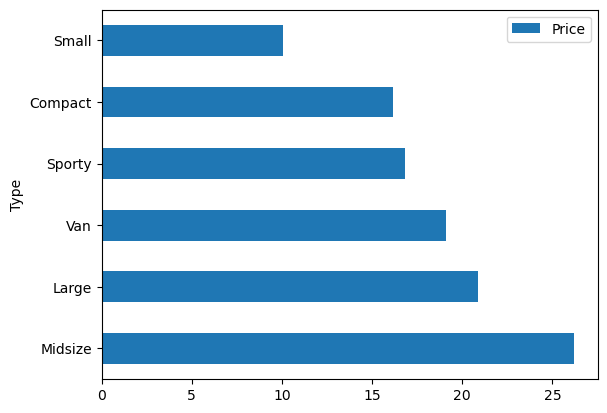

In [43]:
b.plot(kind="barh")

count      94.000000
mean     3068.989362
std       587.942275
min      1695.000000
25%      2625.000000
50%      3035.000000
75%      3522.500000
max      4105.000000
Name: Weight, dtype: float64


<Axes: ylabel='Weight'>

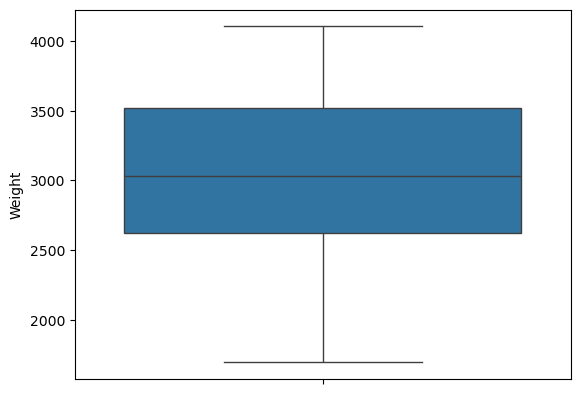

In [44]:
print(df["Weight"].describe())
sns.boxplot(data = df, y="Weight")

<Axes: xlabel='Weight', ylabel='Density'>

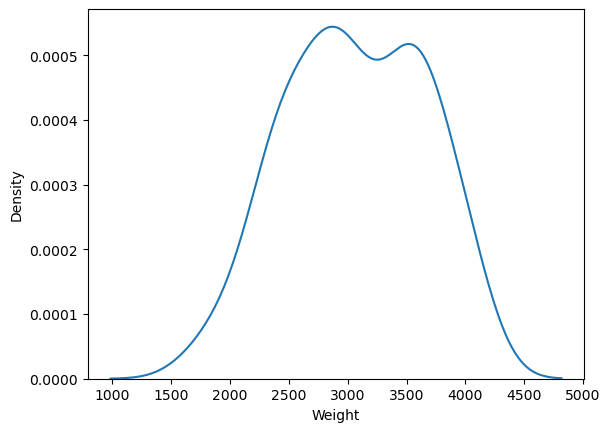

In [45]:
sns.kdeplot(data=df, x="Weight")

<Axes: ylabel='Weight'>

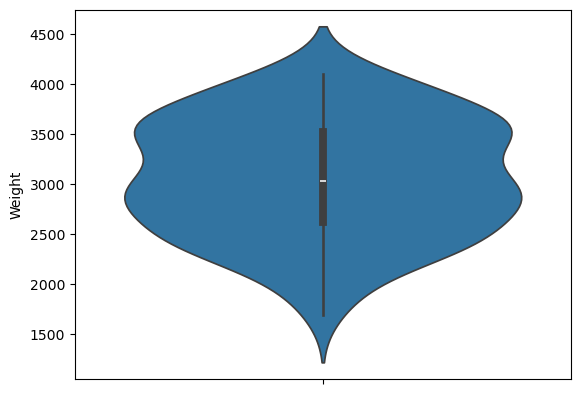

In [46]:
sns.violinplot(data=df, y="Weight")

<Axes: ylabel='Weight'>

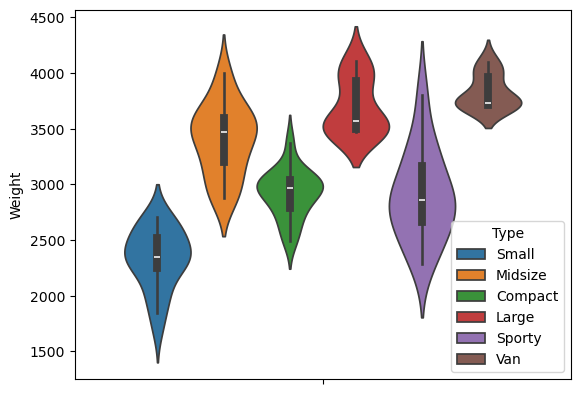

In [47]:
sns.violinplot(data=df, y="Weight", hue="Type")

<Axes: ylabel='Weight'>

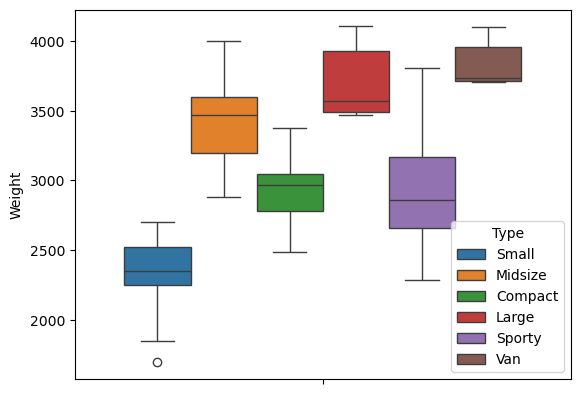

In [48]:
sns.boxplot(data=df, y="Weight", hue="Type")

# Bivariate
1. both variables are Continous (Numerical) - Scatterplot
2. Categorical vs Continous - Boxplot, Voilinplot
3. Categorical vs Catgorical - Crosstab heatmap

In [49]:
df.select_dtypes(include="number")

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1,12.9,15.9,18.8,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,26.5,11.0,2705
1,2,29.2,33.9,38.7,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,30.0,15.0,3560
2,3,25.9,29.1,32.3,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,28.0,14.0,3375
3,4,30.8,37.7,44.6,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,31.0,17.0,3405
4,5,23.7,30.0,36.2,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,27.0,13.0,3640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,17.6,20.0,22.4,21,30,2.0,134,5800,2685,18.5,5,180,103,67,35,31.5,14.0,2985
90,91,22.9,23.3,23.7,18,25,2.8,178,5800,2385,18.5,4,159,97,66,36,26.0,15.0,2810
91,92,21.8,22.7,23.5,21,28,2.3,114,5400,2215,15.8,5,190,104,67,37,29.5,14.0,2985
92,93,24.8,26.7,28.5,20,28,2.4,168,6200,2310,19.3,5,184,105,69,38,30.0,15.0,3245


In [50]:
df.select_dtypes(include="number").columns.tolist()

['id',
 'Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [51]:
df.select_dtypes(include="object").columns.tolist()


['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

# Scatterplot between enginseize and horsepower

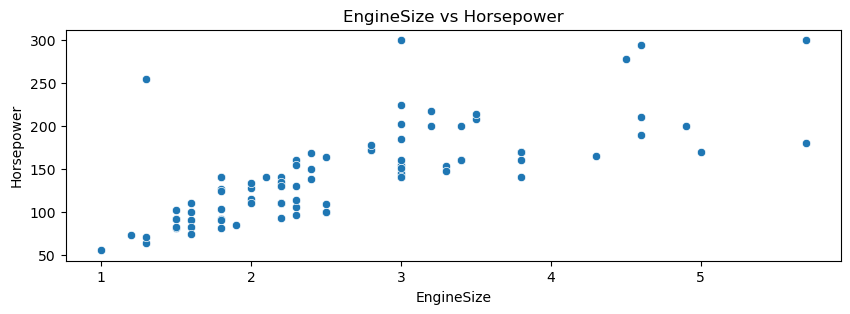

In [52]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x="EngineSize", y="Horsepower")
plt.title("EngineSize vs Horsepower")
plt.show()

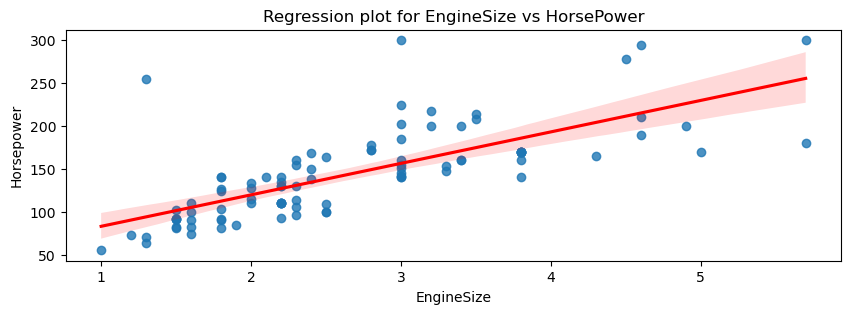

In [53]:
plt.figure(figsize=(10, 3))
sns.regplot(data=df, x="EngineSize", y="Horsepower", line_kws = {"color":"red"})
plt.title("Regression plot for EngineSize vs HorsePower")
plt.show()

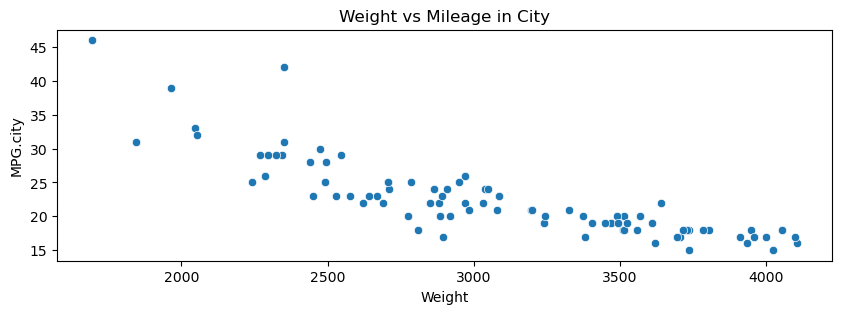

In [54]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x="Weight", y = "MPG.city")
plt.title("Weight vs Mileage in City")
plt.show()

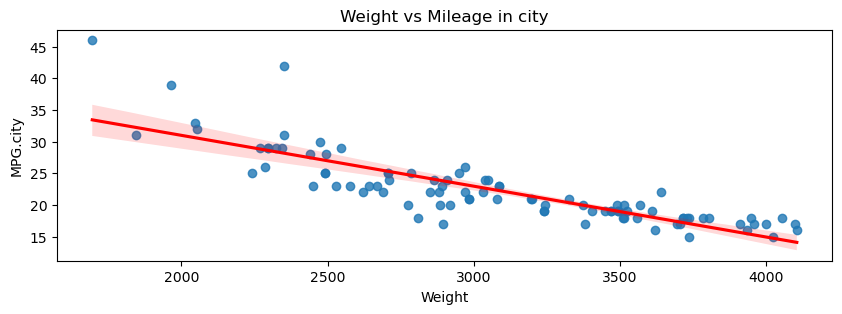

In [55]:
plt.figure(figsize=(10, 3))
sns.regplot(data=df, x="Weight", y="MPG.city", line_kws = {"color": "red"})
plt.title("Weight vs Mileage in city")
plt.show()

# MPG.city vs MPG.highway

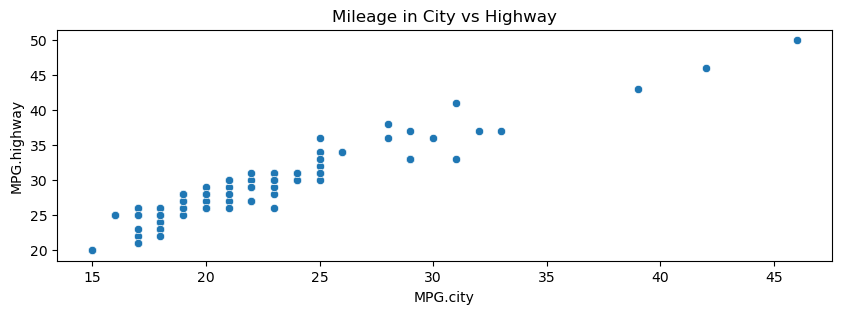

In [56]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x="MPG.city", y="MPG.highway")
plt.title("Mileage in City vs Highway")
plt.show()

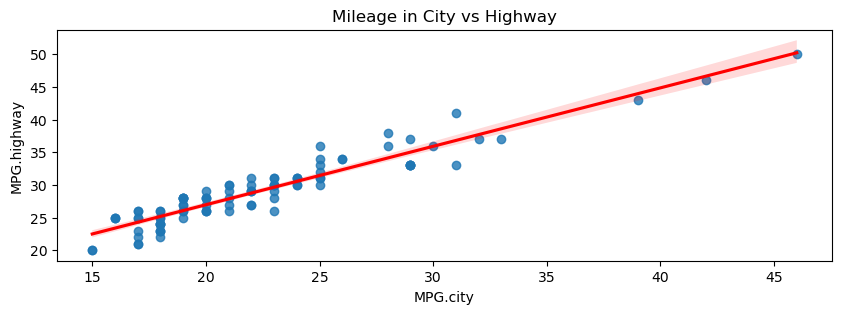

In [57]:
plt.figure(figsize=(10, 3))
sns.regplot(data=df, x="MPG.city", y="MPG.highway", line_kws={"color":"red"})
plt.title("Mileage in City vs Highway")
plt.show()

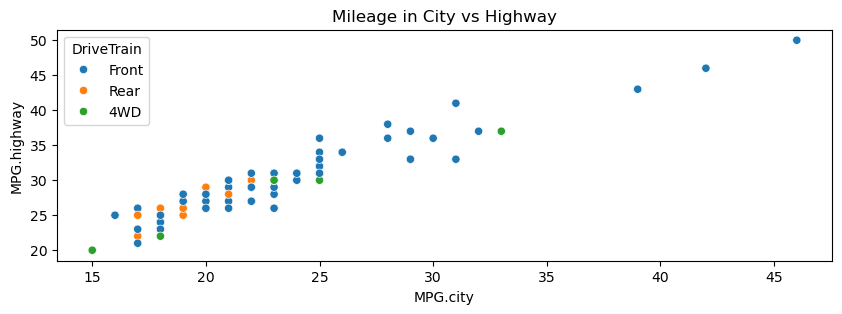

In [58]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x="MPG.city", y="MPG.highway", hue="DriveTrain")
plt.title("Mileage in City vs Highway")
plt.show()

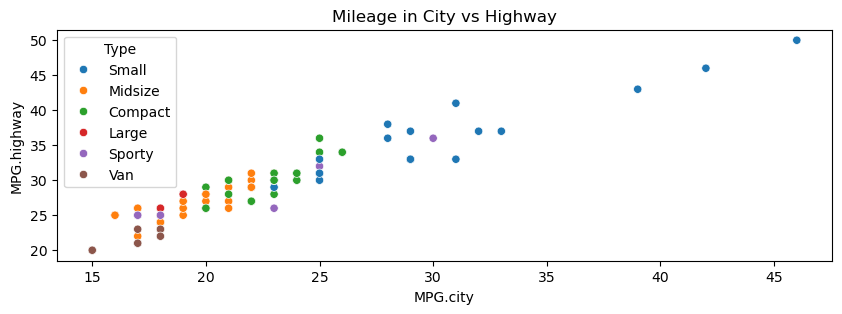

In [59]:
plt.figure(figsize=(10, 3))
sns.scatterplot(data=df, x="MPG.city", y="MPG.highway", hue="Type")
plt.title("Mileage in City vs Highway")
plt.show()

# Catgorical vs Continuous -> Boxplot and Violinplot

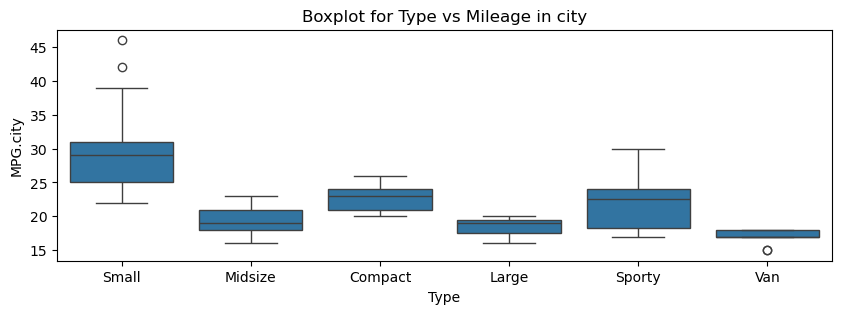

In [60]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Type", y="MPG.city")
plt.title("Boxplot for Type vs Mileage in city")
plt.show()

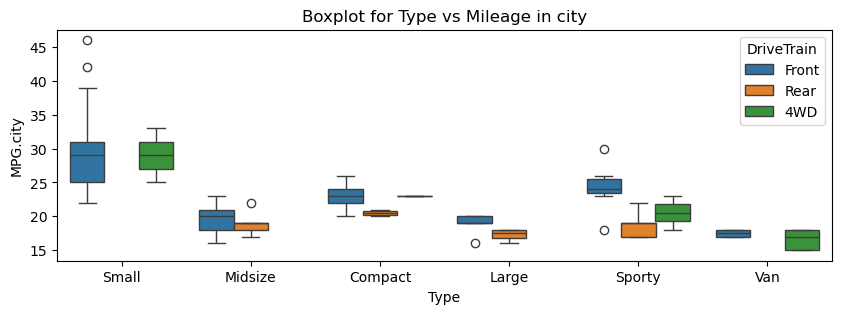

In [61]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Type", y="MPG.city", hue="DriveTrain")
plt.title("Boxplot for Type vs Mileage in city")
plt.show()

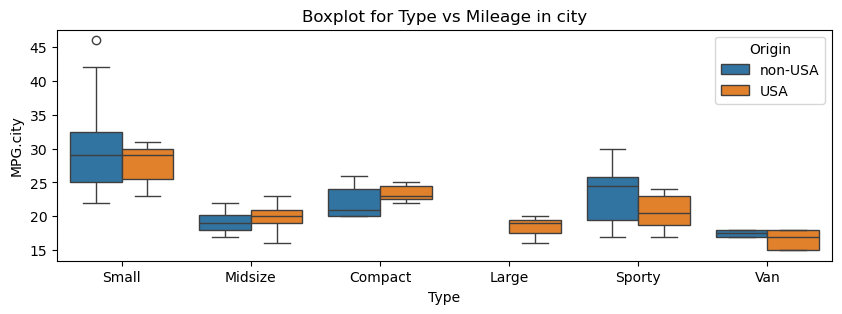

In [62]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Type", y="MPG.city", hue="Origin")
plt.title("Boxplot for Type vs Mileage in city")
plt.show()

# Violin Plot

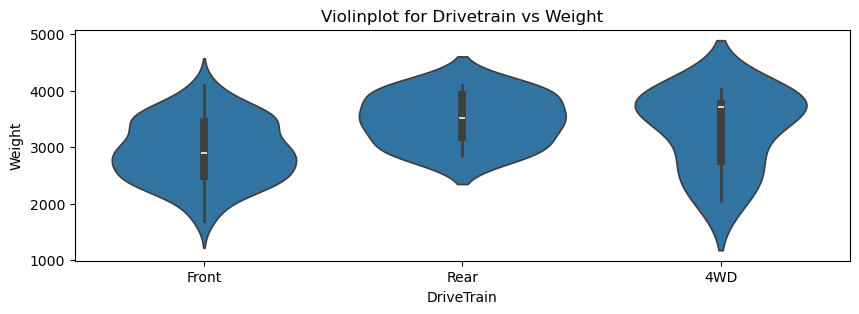

In [63]:
plt.figure(figsize=(10, 3))
sns.violinplot(data=df, x="DriveTrain", y="Weight")
plt.title(f"Violinplot for Drivetrain vs Weight")
plt.show()

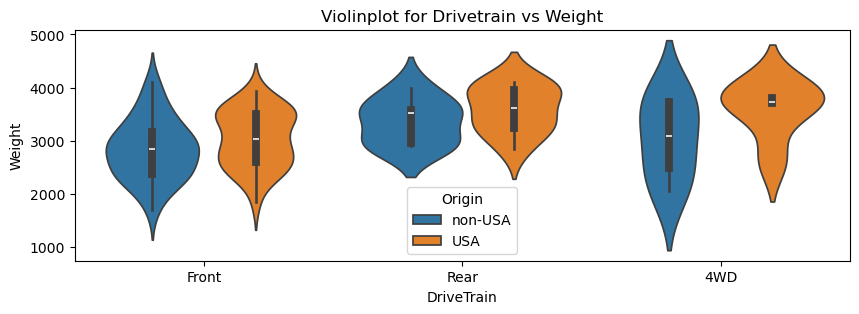

In [64]:
plt.figure(figsize=(10, 3))
sns.violinplot(data=df, x="DriveTrain", y="Weight", hue="Origin")
plt.title(f"Violinplot for Drivetrain vs Weight")
plt.show()

In [66]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

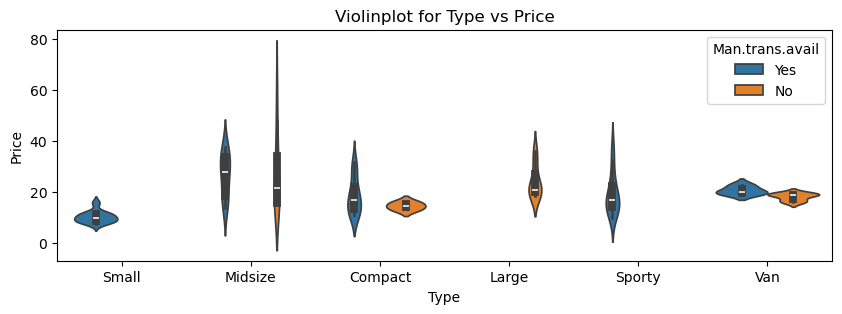

In [67]:
plt.figure(figsize=(10, 3))
sns.violinplot(data=df, x="Type", y="Price", hue="Man.trans.avail")
plt.title("Violinplot for Type vs Price")
plt.show()

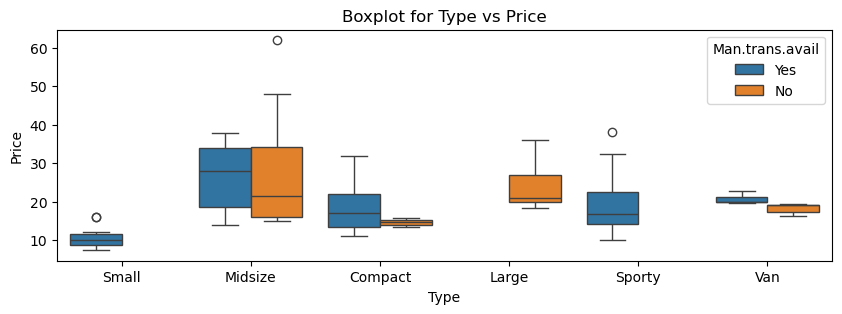

In [68]:
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x="Type", y="Price", hue="Man.trans.avail")
plt.title("Boxplot for Type vs Price")
plt.show()

# Catgorical vs Categorical -> Crosstab heatmap

In [69]:
df.select_dtypes(include="object").columns.tolist()

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [70]:
ctab1 = pd.crosstab(df["Type"], df["DriveTrain"])
ctab1

DriveTrain,4WD,Front,Rear
Type,,,
Compact,1,13,2
Large,0,7,4
Midsize,0,17,5
Small,2,20,0
Sporty,2,7,5
Van,5,4,0


In [71]:
ctab2 = pd.crosstab(df["Type"], df["DriveTrain"], normalize=True)
ctab2


DriveTrain,4WD,Front,Rear
Type,,,
Compact,0.010638,0.138298,0.021277
Large,0.000000,0.074468,0.042553
Midsize,0.000000,0.180851,0.053191
Small,0.021277,0.212766,0.000000
Sporty,0.021277,0.074468,0.053191
Van,0.053191,0.042553,0.000000


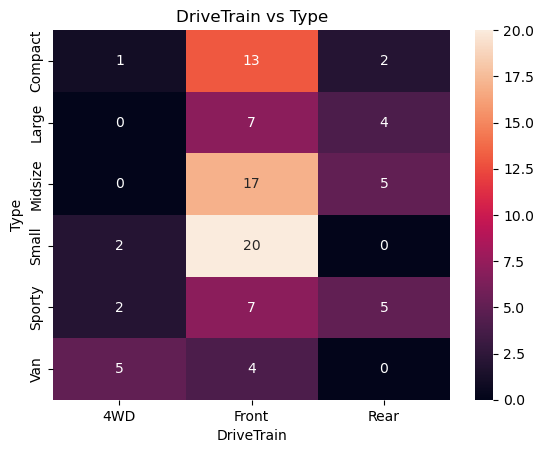

In [72]:
sns.heatmap(ctab1, annot=True, fmt="d")
plt.title("DriveTrain vs Type")
plt.show()

<Axes: xlabel='DriveTrain', ylabel='Type'>

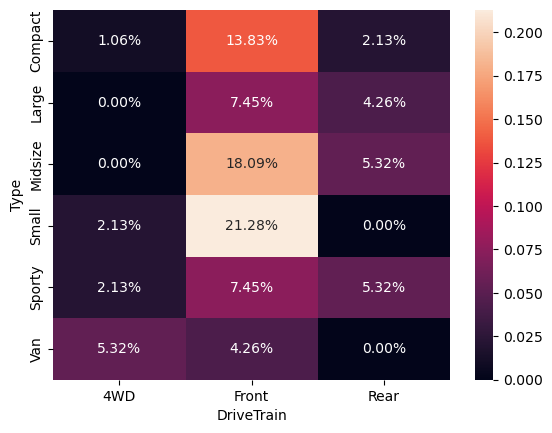

In [73]:
sns.heatmap(ctab2, annot=True, fmt=".2%")

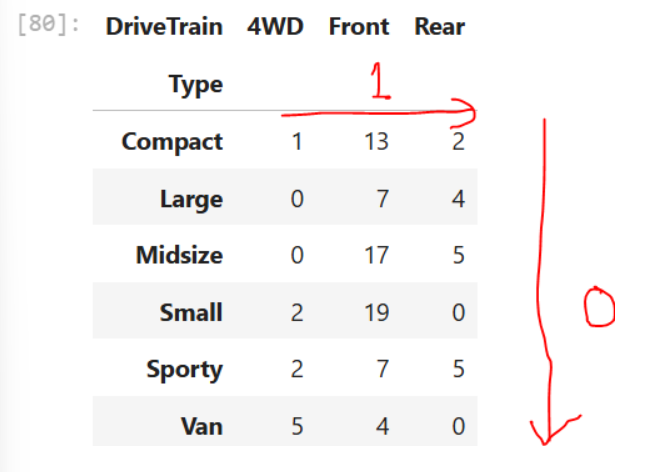

In [74]:
ctab3 = pd.crosstab(df["Type"], df["DriveTrain"], normalize=0)
ctab3

DriveTrain,4WD,Front,Rear
Type,,,
Compact,0.062500,0.812500,0.125000
Large,0.000000,0.636364,0.363636
Midsize,0.000000,0.772727,0.227273
Small,0.090909,0.909091,0.000000
Sporty,0.142857,0.500000,0.357143
Van,0.555556,0.444444,0.000000


<Axes: xlabel='DriveTrain', ylabel='Type'>

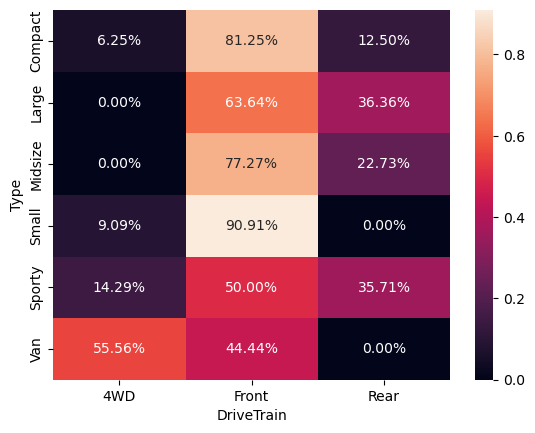

In [75]:
sns.heatmap(ctab3, annot=True, fmt=".2%")


In [76]:
ctab4 = pd.crosstab(df["Type"], df["DriveTrain"], normalize=1)
ctab4

DriveTrain,4WD,Front,Rear
Type,,,
Compact,0.1,0.191176,0.1250
Large,0.0,0.102941,0.2500
Midsize,0.0,0.250000,0.3125
Small,0.2,0.294118,0.0000
Sporty,0.2,0.102941,0.3125
Van,0.5,0.058824,0.0000


<Axes: xlabel='DriveTrain', ylabel='Type'>

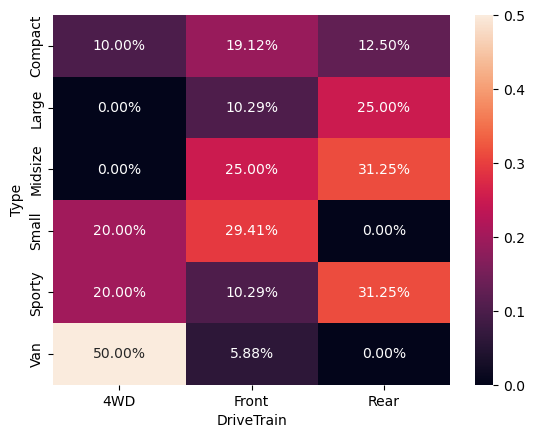

In [77]:
sns.heatmap(ctab4, annot=True, fmt=".2%")


In [78]:
ctab5 = pd.crosstab(df["Cylinders"], df["Origin"])
ctab5

Origin,USA,non-USA
Cylinders,,
3,0,3
4,22,28
5,0,2
6,20,11
8,6,1
rotary,0,1


<Axes: xlabel='Origin', ylabel='Cylinders'>

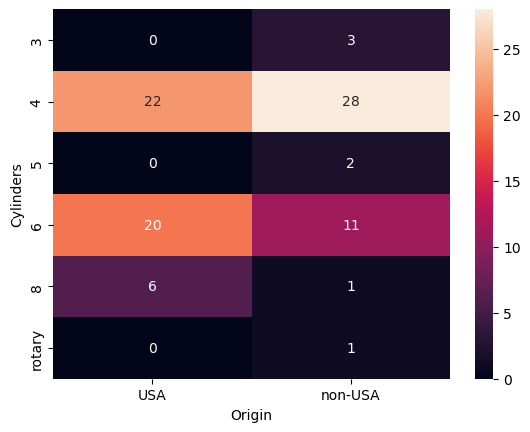

In [80]:
sns.heatmap(ctab5, annot=True, fmt="d")

# Multiveriate analysis
1. pairplot
2. correlation heatmap

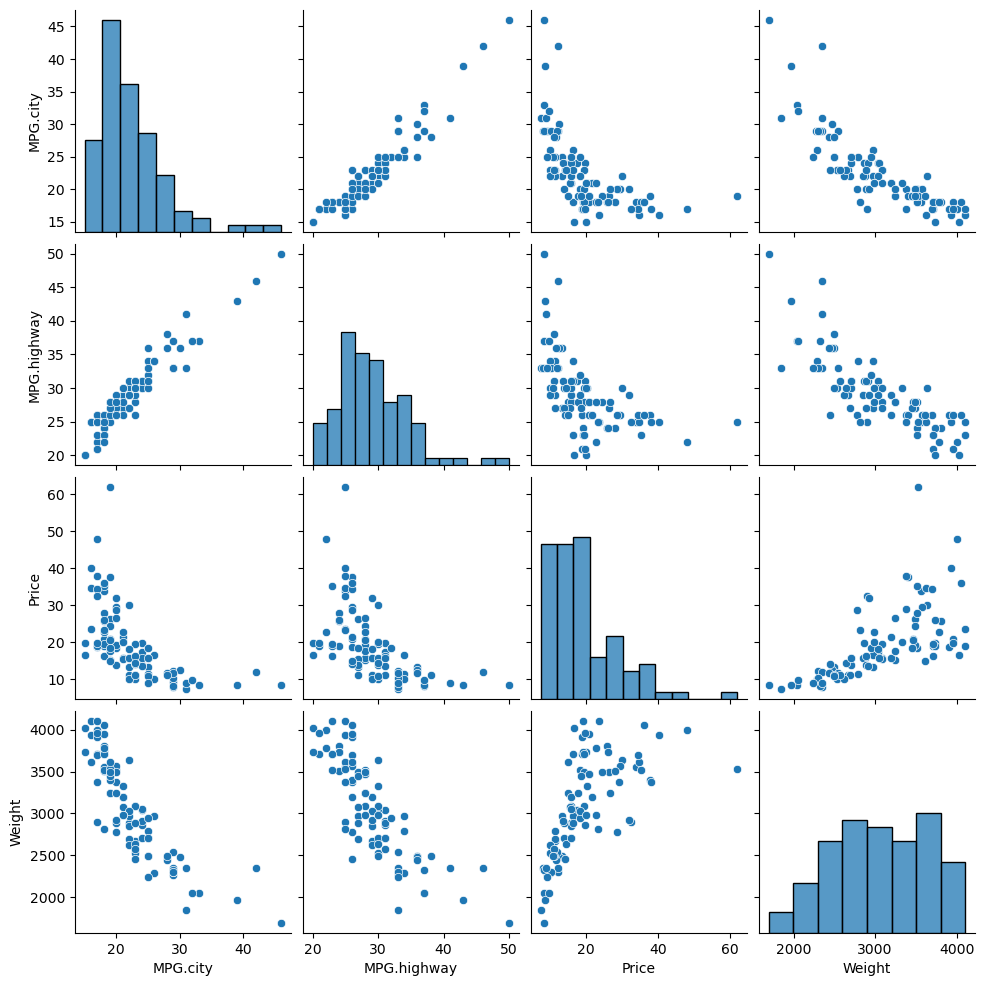

In [81]:
num_cols2 = ["MPG.city", "MPG.highway", "Price", "Weight"]
sns.pairplot(data=df[num_cols2])

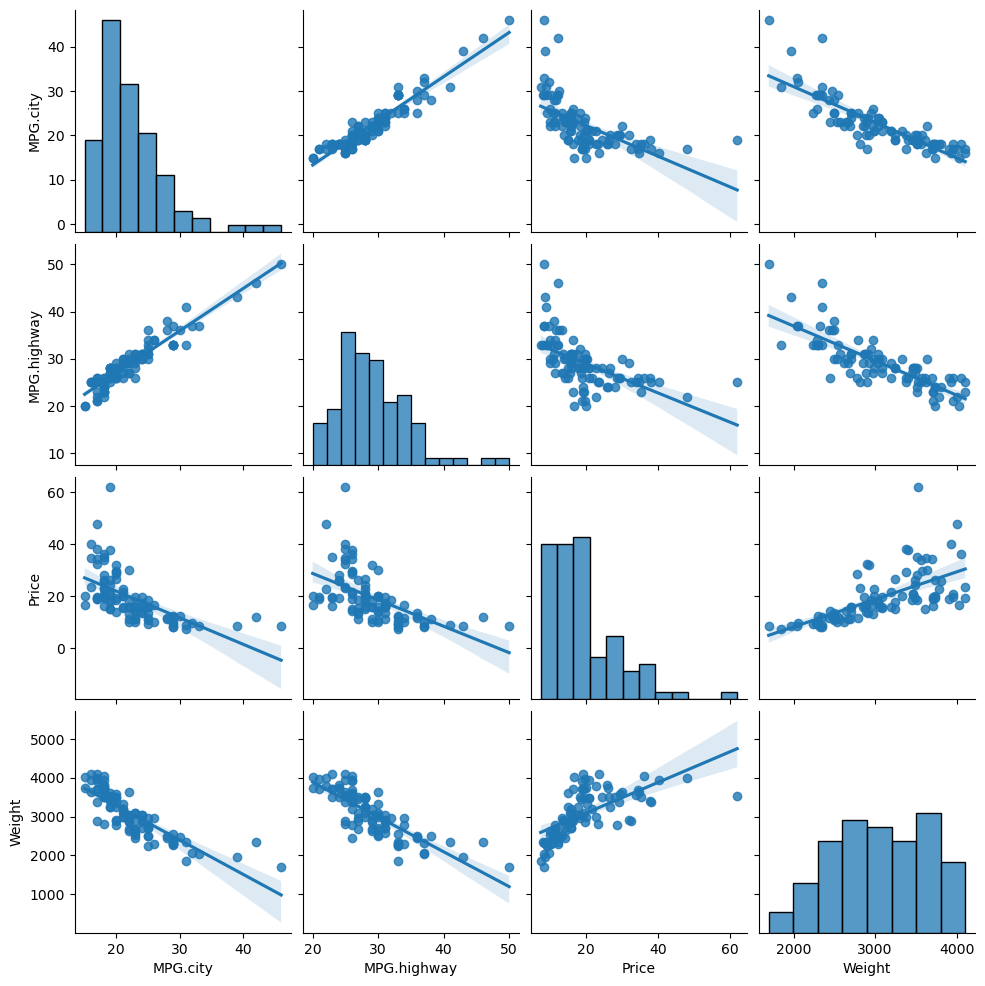

In [82]:
sns.pairplot(data=df[num_cols2], kind="reg")

In [83]:
cols = num_cols2 + ["DriveTrain"]
cols

['MPG.city', 'MPG.highway', 'Price', 'Weight', 'DriveTrain']

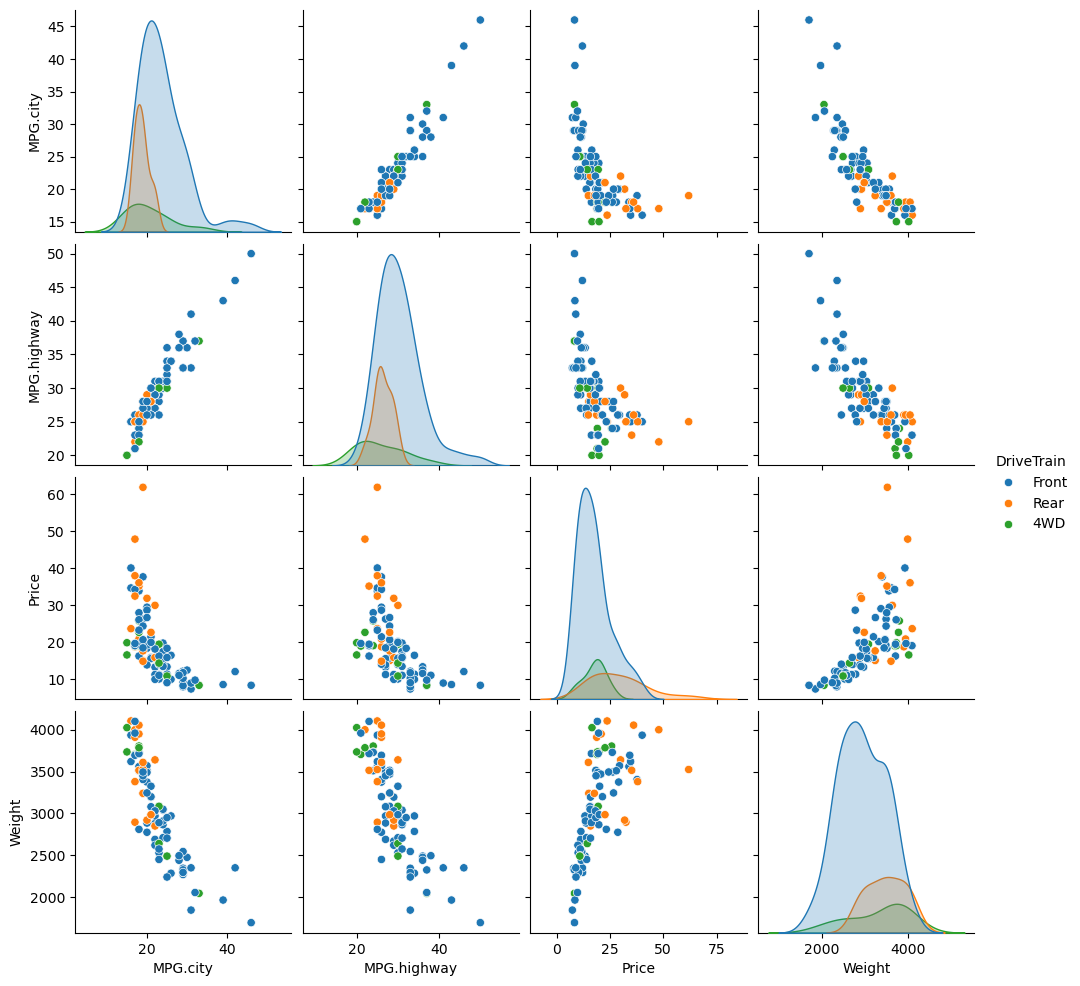

In [84]:
sns.pairplot(data=df[cols], hue="DriveTrain")

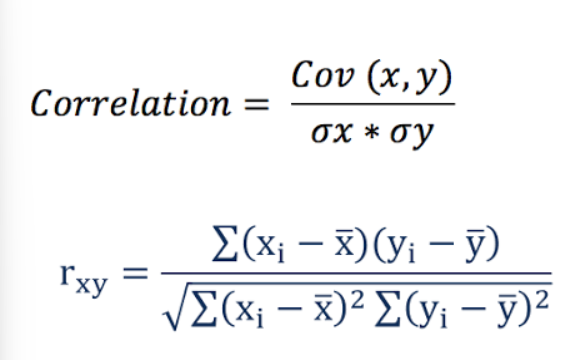

# Correaltion heatmap

In [85]:
df.corr(numeric_only=True)

,id,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
id,1.000000,-0.133371,-0.128341,-0.119514,0.150700,0.128653,-0.316837,-0.228130,0.132321,0.201297,-0.156299,-0.138581,-0.265743,-0.235897,-0.282336,-0.260184,-0.115195,-0.138884,-0.205474
Min.Price,-0.133371,1.000000,0.970596,0.906693,-0.623791,-0.580700,0.646592,0.801795,-0.050621,-0.472440,0.636249,0.061587,0.554831,0.517365,0.493799,0.430364,0.358414,0.399517,0.667560
Price,-0.128341,0.970596,1.000000,0.981556,-0.595296,-0.561313,0.598090,0.787897,-0.011630,-0.427694,0.619551,0.058147,0.504467,0.501415,0.456823,0.393953,0.299149,0.357662,0.647845
Max.Price,-0.119514,0.906693,0.981556,1.000000,-0.548347,-0.523061,0.535301,0.744328,0.019541,-0.374724,0.580763,0.053441,0.443598,0.467959,0.409049,0.348780,0.239242,0.309422,0.605503
MPG.city,0.150700,-0.623791,-0.595296,-0.548347,1.000000,0.943976,-0.710709,-0.672191,0.365527,0.695986,-0.812642,-0.416766,-0.666946,-0.667466,-0.721004,-0.667339,-0.379469,-0.468591,-0.843522
MPG.highway,0.128653,-0.580700,-0.561313,-0.523061,0.943976,1.000000,-0.627232,-0.618879,0.314938,0.587451,-0.784874,-0.466365,-0.543633,-0.615790,-0.640864,-0.594438,-0.363463,-0.335343,-0.810809
EngineSize,-0.316837,0.646592,0.598090,0.535301,-0.710709,-0.627232,1.000000,0.730015,-0.552554,-0.825411,0.761378,0.372055,0.780414,0.731981,0.866512,0.779449,0.473468,0.624276,0.845736
Horsepower,-0.228130,0.801795,0.787897,0.744328,-0.672191,-0.618879,0.730015,1.000000,0.034803,-0.597141,0.708362,0.009328,0.550649,0.486851,0.644222,0.560567,0.230751,0.330032,0.737725
RPM,0.132321,-0.050621,-0.011630,0.019541,0.365527,0.314938,-0.552554,0.034803,1.000000,0.504091,-0.345279,-0.461457,-0.441742,-0.465599,-0.537652,-0.507876,-0.338290,-0.492893,-0.431750
Rev.per.mile,0.201297,-0.472440,-0.427694,-0.374724,0.695986,0.587451,-0.825411,-0.597141,0.504091,1.000000,-0.614614,-0.333706,-0.690025,-0.635692,-0.779032,-0.734067,-0.370686,-0.564947,-0.736271


In [86]:
cols = ["Weight", "MPG.city", "MPG.highway", "Width", "Length", "Price", "Horsepower"]
df[cols].corr()


,Weight,MPG.city,MPG.highway,Width,Length,Price,Horsepower
Weight,1.000000,-0.843522,-0.810809,0.874950,0.806654,0.647845,0.737725
MPG.city,-0.843522,1.000000,0.943976,-0.721004,-0.666946,-0.595296,-0.672191
MPG.highway,-0.810809,0.943976,1.000000,-0.640864,-0.543633,-0.561313,-0.618879
Width,0.874950,-0.721004,-0.640864,1.000000,0.822427,0.456823,0.644222
Length,0.806654,-0.666946,-0.543633,0.822427,1.000000,0.504467,0.550649
Price,0.647845,-0.595296,-0.561313,0.456823,0.504467,1.000000,0.787897
Horsepower,0.737725,-0.672191,-0.618879,0.644222,0.550649,0.787897,1.000000


<Axes: >

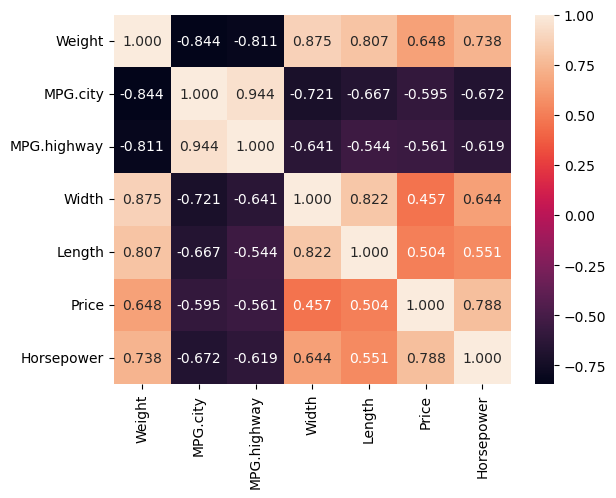

In [87]:
sns.heatmap(df[cols].corr(), annot=True, fmt=".3f")


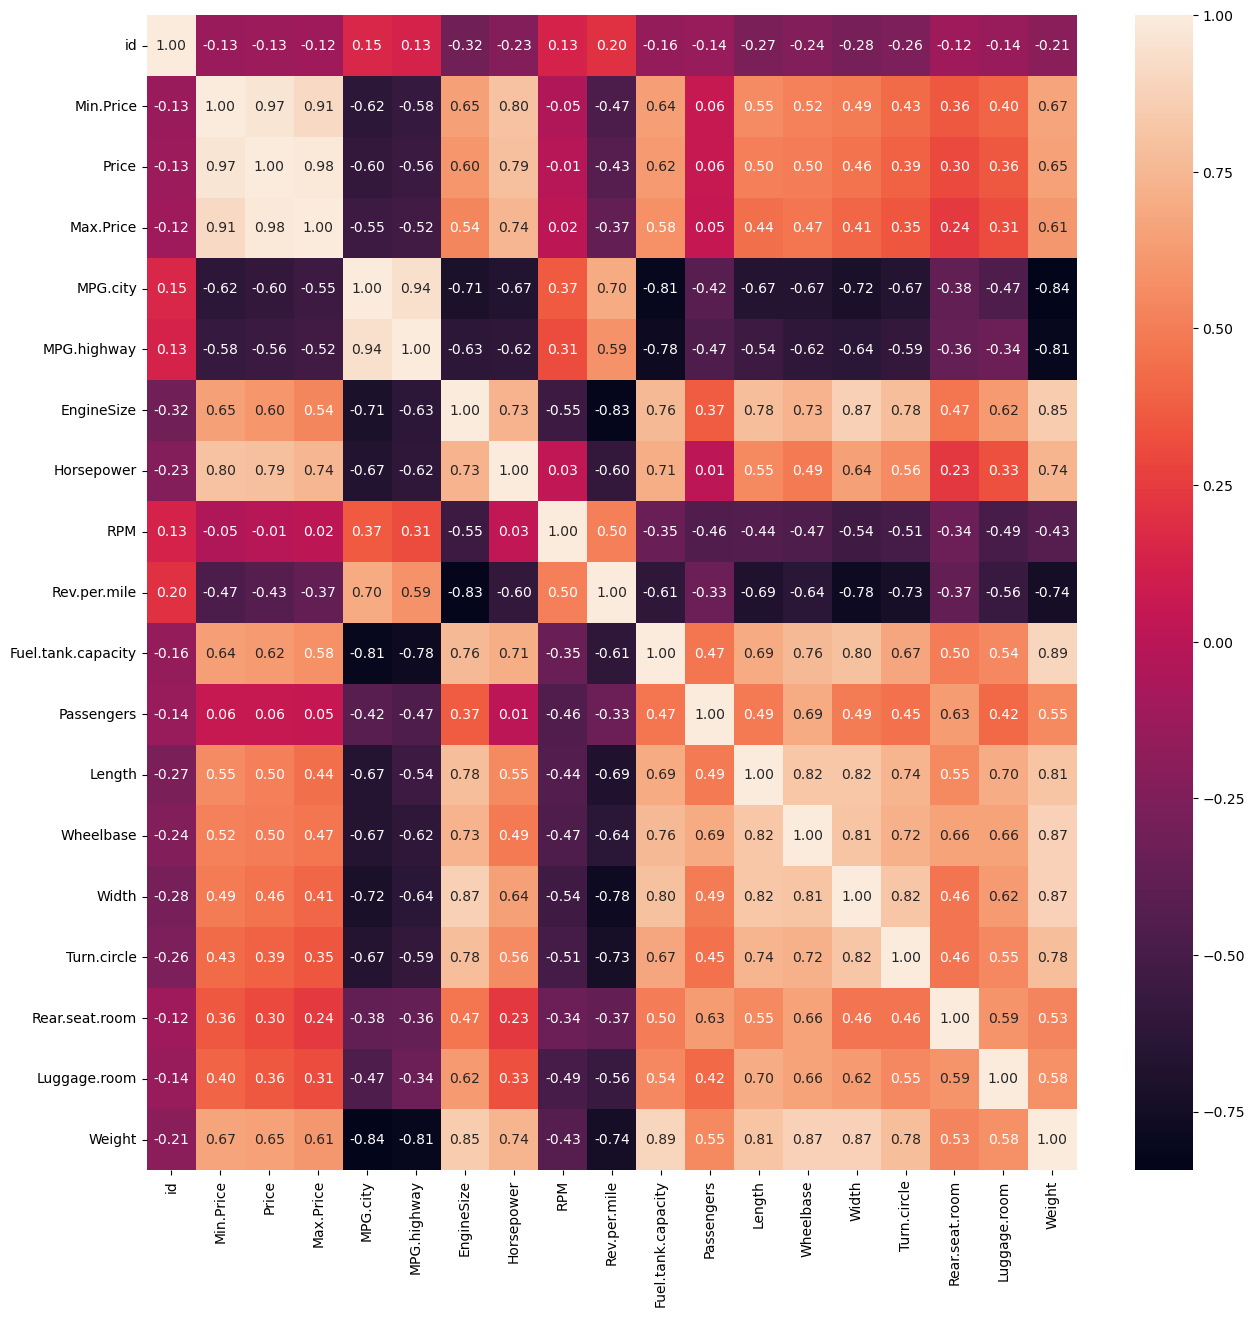

In [88]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

 # Extra

In [89]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [90]:
a = pd.pivot_table(
    data=df,
    index="Type",
    columns="Origin",
    values="Weight",
    aggfunc="mean"
).round(2)
a

Origin,USA,non-USA
Type,,
Compact,2786.43,3020.56
Large,3695.45,NaN
Midsize,3355.50,3437.08
Small,2350.71,2321.33
Sporty,3039.38,2713.33
Van,3779.00,3895.00


<Axes: title={'center': 'Average Price by Type and Origin'}, xlabel='Type'>

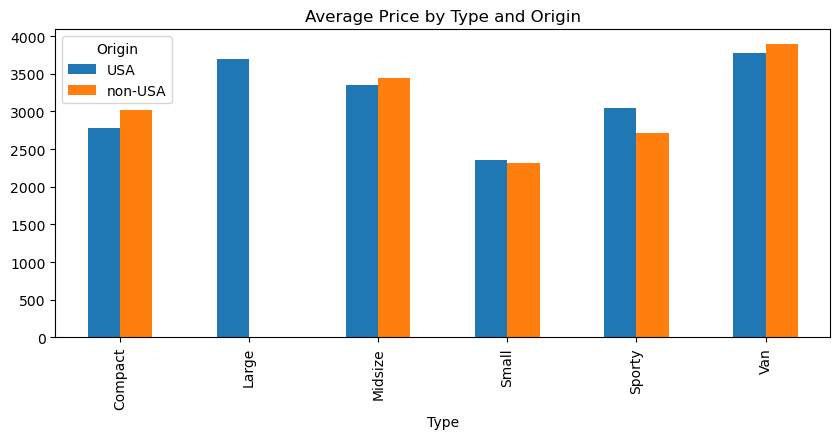

In [91]:
a.plot(kind="bar", title="Average Price by Type and Origin", figsize=(10, 4))

<Axes: ylabel='Type'>

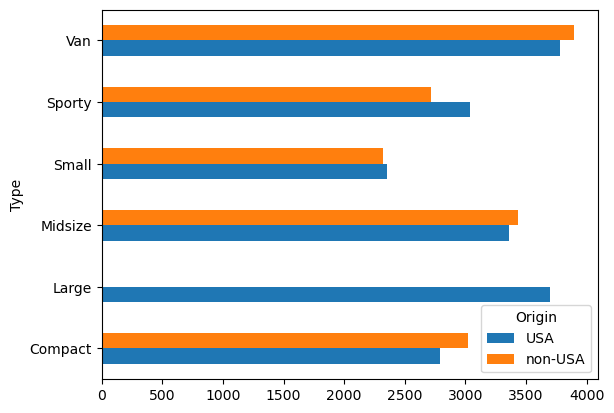

In [92]:
a.plot(kind="barh")

In [93]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [94]:
b = pd.pivot_table(
    data=df,
    index="DriveTrain",
    columns = "Cylinders",
    values = "Price",
    aggfunc="median"
)
b

Cylinders,3,4,5,6,8,rotary
DriveTrain,,,,,,
4WD,8.4,16.95,NaN,19.1,NaN,NaN
Front,8.5,12.90,23.2,22.4,37.4,NaN
Rear,NaN,26.35,NaN,20.7,36.1,32.5


<Axes: ylabel='DriveTrain'>

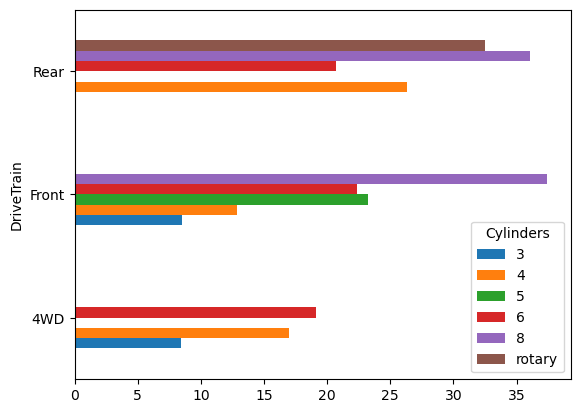

In [95]:
b.plot(kind="barh")